<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [21]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [22]:
dados = pd.read_csv(r'C:\Users\LMMARTINHO\Documents\Courses\Statistics\Parte 5 - Regressão Linear\dados - exercicio\HousePrices_HalfMil.csv', sep = ';')

## Visualizar os dados

In [23]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [24]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [25]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependente (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [26]:
dados.corr()

## As mais correlacionadas são o acabamento de mármore branco e os andares.
# Sendo o relacionamento positivo.
# Não existe correlação forte entre as variáveis explicativas.

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [27]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [28]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 1.0, 'Box Plot Preços de Imóveis')

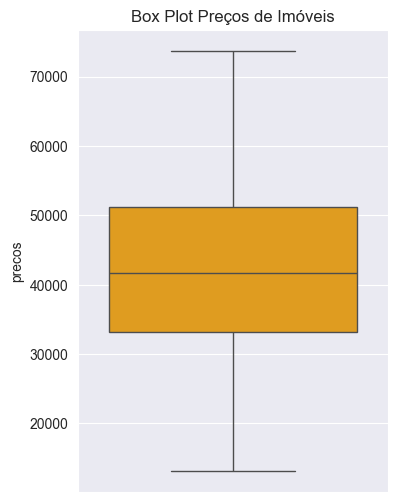

In [29]:
ax = sns.boxplot(data=dados, y='precos', color='orange')
ax.figure.set_size_inches(4,6)
ax.set_title('Box Plot Preços de Imóveis')

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

Text(0.5, 1.0, 'Box Plot Preços de Imóveis por garagem')

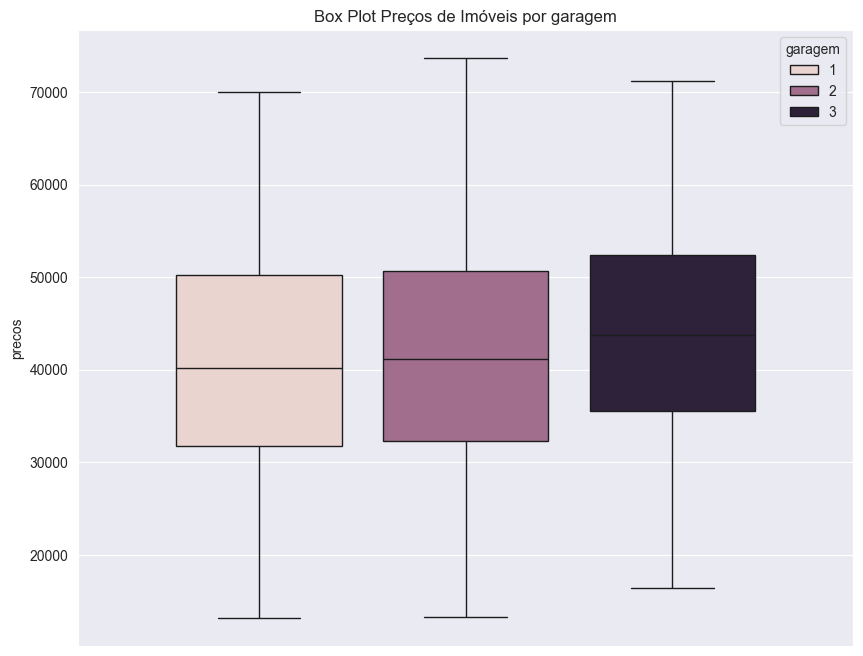

In [30]:
ax = sns.boxplot(data=dados, y='precos', hue = 'garagem', gap = 0.2)
ax.figure.set_size_inches(10,8)
ax.set_title('Box Plot Preços de Imóveis por garagem')

### Box-plot (Preço X Banheiros)

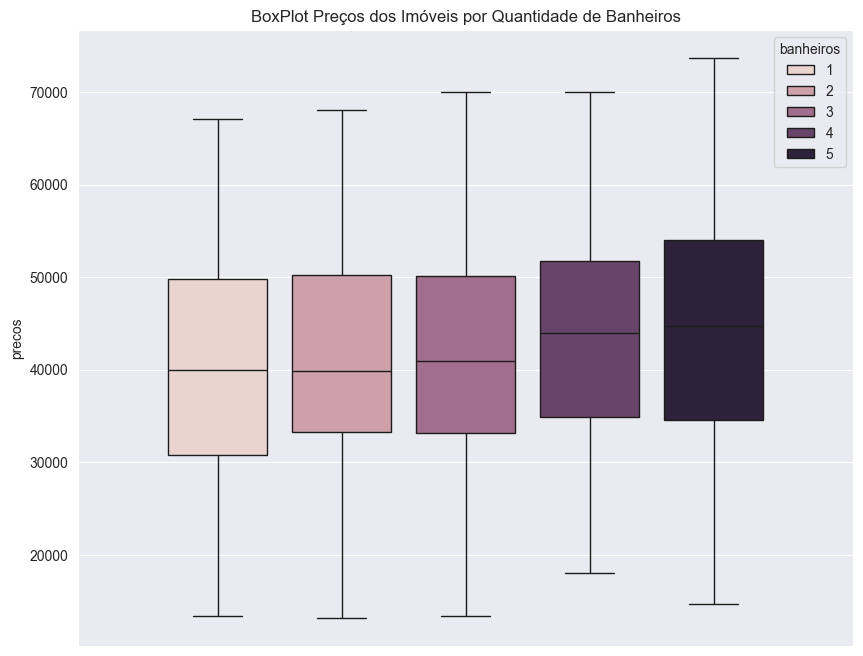

In [31]:
ax = sns.boxplot(data=dados, y = 'precos', hue= 'banheiros', gap=0.2)
ax.set_title('BoxPlot Preços dos Imóveis por Quantidade de Banheiros')
ax.figure.set_size_inches(10,8)

### Box-plot (Preço X Lareira)

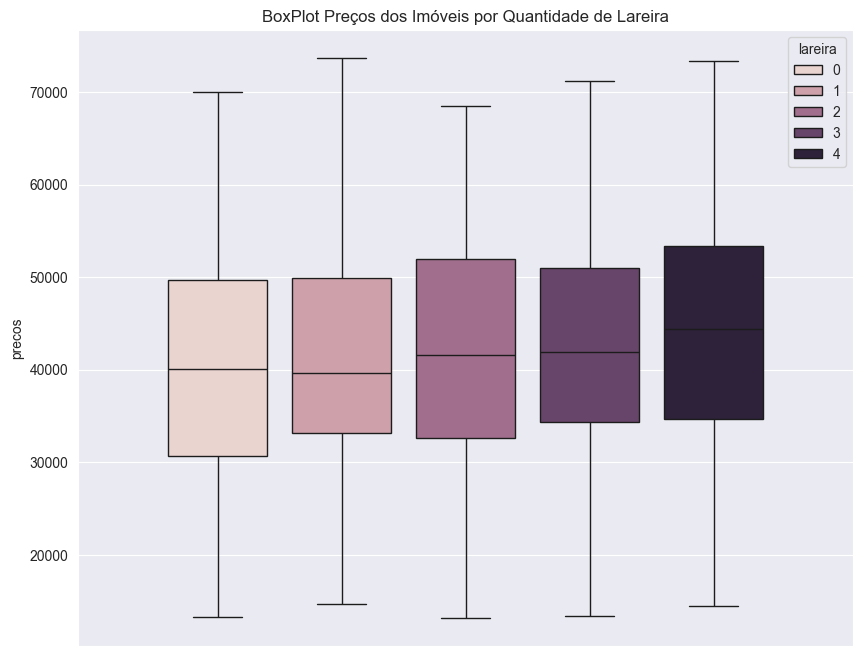

In [32]:
ax = sns.boxplot(data=dados, y = 'precos', hue= 'lareira', gap=0.2)
ax.set_title('BoxPlot Preços dos Imóveis por Quantidade de Lareira')
ax.figure.set_size_inches(10,8)

### Box-plot (Preço X Acabamento em Mármore)

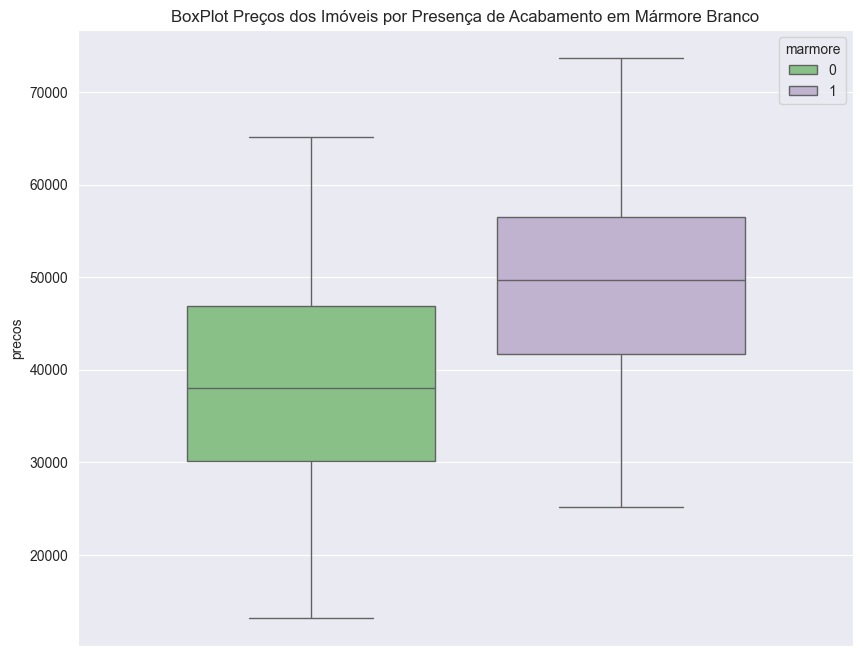

In [33]:
ax = sns.boxplot(data=dados, y = 'precos', hue= 'marmore', gap=0.2)
ax.set_title('BoxPlot Preços dos Imóveis por Presença de Acabamento em Mármore Branco')
ax.figure.set_size_inches(10,8)

### Box-plot (Preço X Andares)

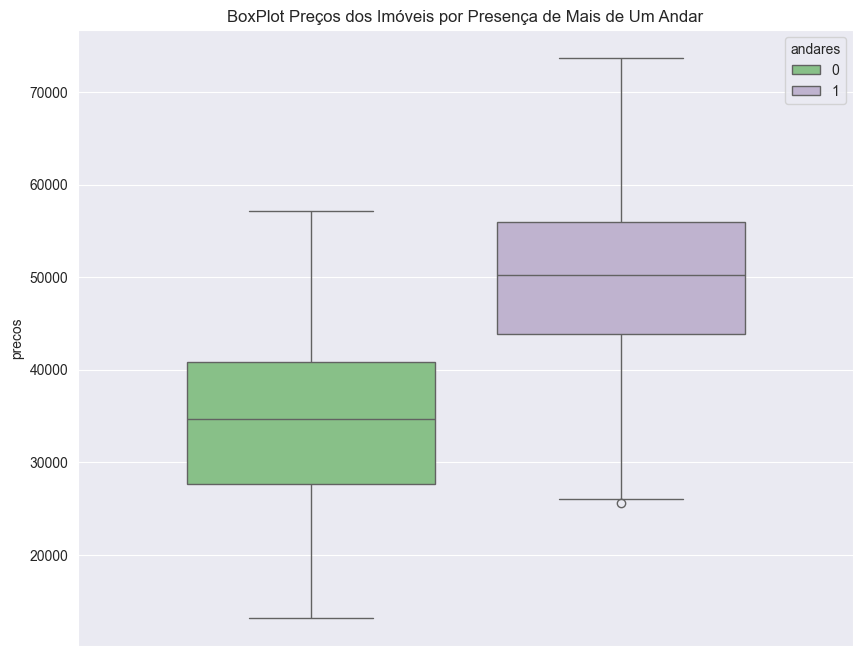

In [34]:
ax = sns.boxplot(data=dados, y = 'precos', hue= 'andares', gap=0.2)
ax.set_title('BoxPlot Preços dos Imóveis por Presença de Mais de Um Andar')
ax.figure.set_size_inches(10,8)

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li> Não
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li> Sim, mas são necessários testes mais formais de normalidade.

</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

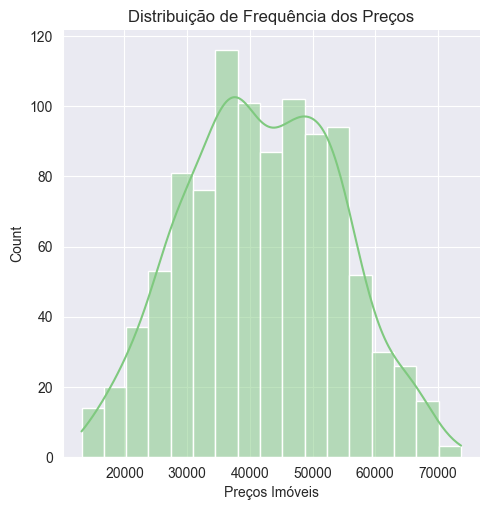

In [35]:
ax = sns.displot(data=dados, x= 'precos', kde=True)
ax.set(title='Distribuição de Frequência dos Preços')
ax.set_xlabels('Preços Imóveis')


## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

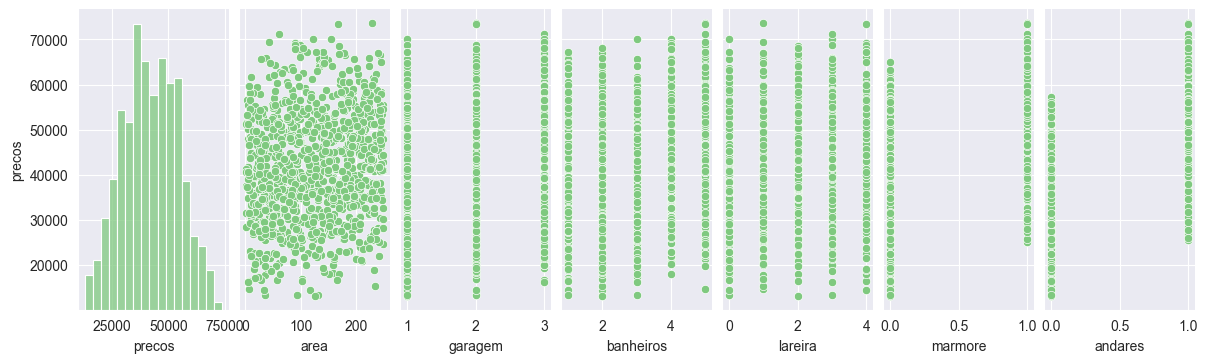

In [36]:
ax = sns.pairplot(data=dados, y_vars='precos')
ax.figure.set_size_inches(12,4)

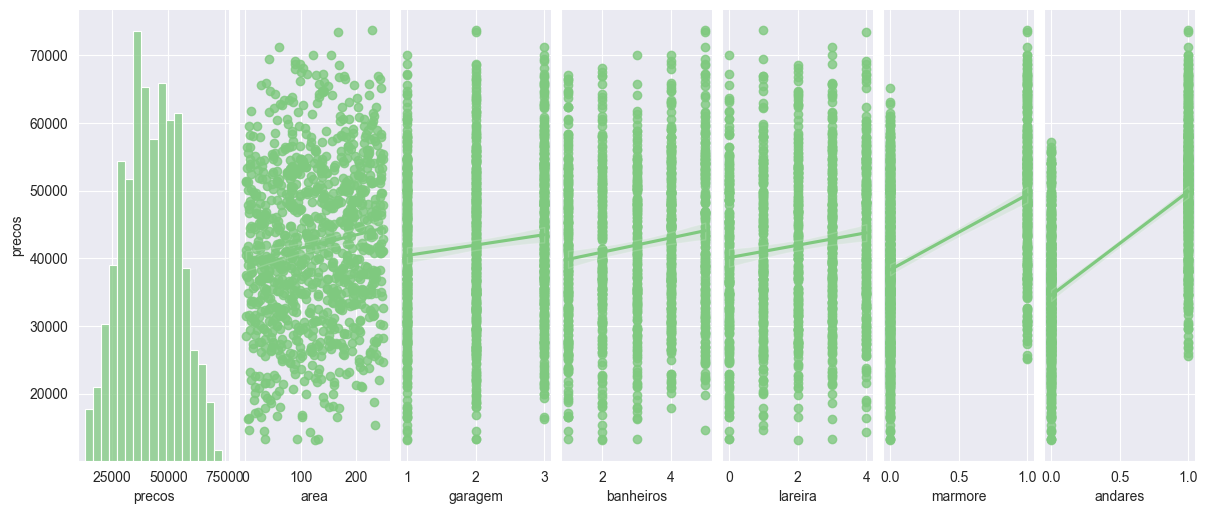

In [37]:
ax = sns.pairplot(data=dados, y_vars='precos', kind='reg')
ax.figure.set_size_inches(12,6)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [38]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [39]:
y = dados['precos']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [40]:
X = dados[['marmore','andares']]

## Criando os datasets de treino e de teste

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [43]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [44]:
modelo.fit(X=X_train, y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li> Mais ou menos
    <li>Você lembra o que representa o R²?</li> Representa o quanto de 0 a 1 a variáveld dependente é explicada pelas variáveis independentes.
    <li>Qual medida podemos tomar para melhorar essa estatística?</li> Ao aumentar as variáveis independentes, o R2 sempre vai aumentar. Mas existe outras estatísticas que dizem quando parar de adicionar variáveis.
</ul>

In [45]:
modelo.score(X_train,y_train)

0.59458883982093

In [46]:
modelo2 = LinearRegression()
X2 = dados[['marmore','andares','garagem','lareira','banheiros','area']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.33, random_state=42)
modelo2.fit(X=X2_train, y=y2_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [47]:
modelo2.score(X2_train,y2_train)

0.6611765090503073

In [48]:
modelo3 = LinearRegression()
X3 = dados[['marmore','andares','garagem','lareira','banheiros']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.33, random_state=42)
modelo3.fit(X=X3_train, y=y3_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [49]:
modelo3.score(X3_train,y3_train)

0.6399751987568199

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [50]:
y_predict = modelo.predict(X=X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [51]:
metrics.r2_score(y_test,y_predict)

0.5729844032724065

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [54]:
area = 38
banheiros = 4
marmore = 0
andares = 1
garagem = 2
lareira = 4

entrada = [[marmore,andares,garagem,lareira,banheiros, area]]
modelo2.predict(entrada)

print('O Preço Médio Previsto do Imóvel para esses valores é de {0:.2f}' . format(modelo2.predict(entrada)[0]))

O Preço Médio Previsto do Imóvel para esses valores é de 46812.21


c:\Users\LMMARTINHO\Documents\Courses\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\LMMARTINHO\Documents\Courses\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Outras variáveis

In [116]:
import numpy as np
EQM = round(metrics.mean_squared_error(y_test,y_predict),2)
R_EQM = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
R2 = metrics.r2_score(y_test,y_predict)

consolidado = pd.DataFrame([EQM, R_EQM,R2],['EQM', 'R_EQM','R2'], columns=['Modelo Mármore e Andares'])

y2_predict = modelo2.predict(X=X2_test)
EQM2 = round(metrics.mean_squared_error(y2_test,y2_predict),2)
R_EQM2 = round(np.sqrt(metrics.mean_squared_error(y2_test,y2_predict)),2)
R2_2 = metrics.r2_score(y2_test,y2_predict)

consolidado['Modelo All Features'] = [EQM2, R_EQM2,R2_2]

y3_predict = modelo3.predict(X=X3_test)
EQM3 = round(metrics.mean_squared_error(y3_test,y3_predict),2)
R_EQM3 = round(np.sqrt(metrics.mean_squared_error(y3_test,y3_predict)),2)
R2_3 = metrics.r2_score(y3_test,y3_predict)

consolidado['Modelo All Features - Area'] = [EQM3, R_EQM3,R2_3]

for column in consolidado.columns:
        consolidado[column] = consolidado[column].apply(lambda x: f"{x:.4f}")  ## para formatar melhor

consolidado


,Modelo Mármore e Andares,Modelo All Features,Modelo All Features - Area
EQM,62848356.3900,56194603.6900,58456056.0500
R_EQM,7927.6955,7496.3100,7645.6600
R2,0.5730,0.6182,0.6028


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [120]:
import pickle

## Salvando o modelo estimado

In [125]:
output = open('modelo_imoveis', 'wb')
pickle.dump(modelo2,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```